In [1]:
library(cluster)
library(classInt)
library(RColorBrewer)
library(grid)
library(rgdal)
library(ggplot2)
library(gridExtra)
library(raster)
library(lattice)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [2]:
out <- '/Users/dongmeichen/Documents/beetle/images/DEA/'

In [3]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', DATA))
head(data)

beetleAcres lon       lat        etopo1    mStdAge    density   mfri     
1 0.9889048   -1.688095 -0.8165767 -2.085849 -1.3350325 1.5805318 -1.272927
2 0.9889048   -1.673234 -0.7636426 -1.898007 -1.0126988 1.2731710 -1.272927
3 0.9889048   -1.647397 -0.8096216 -1.906174  1.4076788 1.3656373 -1.272927
4 0.9889048   -1.650107 -0.7848950 -2.107116  2.9144370 0.9328562 -1.272927
5 1.0377935   -1.709590 -0.2661335 -2.053066  0.1262329 1.1768966 -1.272927
6 1.3365791   -1.712549 -0.2414535 -2.020680 -0.2400199 1.3839081 -1.272927
  prs       GAP1       GAP3      ⋯ summerP1_sq JanMin_sq Jan20_sq  
1 -1.181455 -0.4134775 -1.336267 ⋯ -1.1203220  -1.727787 -0.5901567
2 -1.181455 -0.4134775 -1.336267 ⋯ -1.1154629  -1.730798 -0.5901567
3 -1.181455 -0.4134775 -1.336267 ⋯ -1.1282896  -1.729906 -0.5901567
4 -1.181455 -0.4134775 -1.336267 ⋯ -1.1328530  -1.730057 -0.5901567
5 -1.181455 -0.4134775 -1.336267 ⋯ -0.7774133  -1.730436 -0.5901567
6 -1.181455 -0.4134775 -1.336267 ⋯ -0.7519392  -1.730789 -0.5901567
  PcumOctSep_sq Tmean_exp   TMarAug_exp fallTmean_exp vcc_log    mfri_log 
1 2.863514      -0.05063177 -0.09477036 -0.03941164   -2.7104504 -1.799774
2 2.342172      -0.02689908 -0.09232931 -0.01876778   -2.7104504 -1.799774
3 2.152967       0.04220516 -0.08405338  0.04636415   -2.7104504 -1.799774
4 1.979607       0.20567735 -0.06813269  0.20040765   -2.7104504 -1.799774
5 2.710080      -0.02737714 -0.09138732 -0.02090733    0.2979916 -1.799774
6 2.752733      -0.06793202 -0.09495603 -0.06064562    0.2979916 -1.799774
  Mar20_logp1
1 -0.7538392 
2 -0.7538392 
3 -0.7538392 
4 -0.7538392 
5 -0.7538392 
6 -0.7538392

In [4]:
results <- read.csv(sprintf('%s/gwr_results_wo_FIA_scaled.csv', DATA))
head(results)

sum.w    X.Intercept. lon      lat       etopo1     mStdAge      density  
1 179.3810   0.1415684  33.03623 -9.218477 0.05871201  0.010811509 0.1806816
2 178.7698  -3.6612042  20.76604 -8.070797 0.05771467  0.012448760 0.1925937
3 157.6484 -10.1485996  30.71243 -8.851384 0.05904493  0.013322160 0.1664343
4 162.9387  -9.5849592  23.82488 -8.392647 0.05932772  0.014014556 0.1778018
5 156.2273  17.5394159  22.55026 -3.902086 0.12669510 -0.008600148 0.2328258
6 153.9836  18.4356762  24.75736 -4.318546 0.11680332 -0.007635206 0.2237035
  GAP1          GAP3        vpd        ⋯ PcumOctSep_sq_se_EDF Tmean_exp_se_EDF
1 -0.0013937789 0.005693415 -0.2017655 ⋯ 12.24540             0.08407679      
2 -0.0016813496 0.005101505 -0.1669970 ⋯ 13.69589             0.10072544      
3  0.0003556767 0.004180959 -0.1646455 ⋯ 17.14422             0.10861592      
4 -0.0002953328 0.004224579 -0.1556592 ⋯ 16.59023             0.11303300      
5 -0.0039922863 0.006530215 -0.6412754 ⋯ 21.85377             0.62683604      
6 -0.0039190878 0.006276234 -0.6357297 ⋯ 22.18092             0.64932375      
  TMarAug_exp_se_EDF fallTmean_exp_se_EDF vcc_log_se_EDF mfri_log_se_EDF
1 0.04578534         0.04780801           0.005005524    0.008588155    
2 0.05335163         0.05889318           0.005074091    0.008943654    
3 0.05776430         0.06361146           0.005672411    0.010234760    
4 0.05934435         0.06688118           0.005504149    0.010007099    
5 0.19988746         0.68074955           0.005466877    0.008551114    
6 0.20200314         0.73206073           0.005463762    0.008586275    
  Mar20_logp1_se_EDF pred.se.1  coord.x coord.y
1  1.777169          0.05139024 -990000 -460000
2  4.549491          0.03754500 -980000 -440000
3  6.575668          0.03501581 -970000 -460000
4  7.256753          0.04168876 -970000 -450000
5 19.215477          0.03562303 -970000 -240000
6 19.098600          0.03606148 -970000 -230000

In [5]:
names(results)

[1] "sum.w"                "X.Intercept."         "lon"                 
  [4] "lat"                  "etopo1"               "mStdAge"             
  [7] "density"              "GAP1"                 "GAP3"                
 [10] "vpd"                  "summerP0"             "Tmean"               
 [13] "mi"                   "Tvar"                 "wd"                  
 [16] "AugTmean"             "OctTmin"              "AugTmax"             
 [19] "Acs"                  "MarMin"               "PPT"                 
 [22] "summerP2"             "TMarAug"              "Mar20"               
 [25] "fallTmean"            "MarTmin"              "Tmin"                
 [28] "winterMin"            "summerTmean"          "Pmean"               
 [31] "minT"                 "TOctSep"              "Jan20"               
 [34] "PcumOctSep"           "lon_sq"               "lat_sq"              
 [37] "etopo1_sq"            "density_sq"           "mStdAge_sq"          
 [40] "prs_sq"               "vpd_sq"               "cwd_sq"              
 [43] "maxAugT_sq"           "summerP0_sq"          "Tmean_sq"            
 [46] "mi_sq"                "Tvar_sq"              "wd_sq"               
 [49] "OctTmin_sq"           "AugMaxT_sq"           "Acs_sq"              
 [52] "ddAugJun_sq"          "ddAugJul_sq"          "PPT_sq"              
 [55] "summerP2_sq"          "Pmean_sq"             "summerP1_sq"         
 [58] "JanMin_sq"            "Jan20_sq"             "PcumOctSep_sq"       
 [61] "Tmean_exp"            "TMarAug_exp"          "fallTmean_exp"       
 [64] "vcc_log"              "mfri_log"             "Mar20_logp1"         
 [67] "X.Intercept._se"      "lon_se"               "lat_se"              
 [70] "etopo1_se"            "mStdAge_se"           "density_se"          
 [73] "GAP1_se"              "GAP3_se"              "vpd_se"              
 [76] "summerP0_se"          "Tmean_se"             "mi_se"               
 [79] "Tvar_se"              "wd_se"                "AugTmean_se"         
 [82] "OctTmin_se"           "AugTmax_se"           "Acs_se"              
 [85] "MarMin_se"            "PPT_se"               "summerP2_se"         
 [88] "TMarAug_se"           "Mar20_se"             "fallTmean_se"        
 [91] "MarTmin_se"           "Tmin_se"              "winterMin_se"        
 [94] "summerTmean_se"       "Pmean_se"             "minT_se"             
 [97] "TOctSep_se"           "Jan20_se"             "PcumOctSep_se"       
[100] "lon_sq_se"            "lat_sq_se"            "etopo1_sq_se"        
[103] "density_sq_se"        "mStdAge_sq_se"        "prs_sq_se"           
[106] "vpd_sq_se"            "cwd_sq_se"            "maxAugT_sq_se"       
[109] "summerP0_sq_se"       "Tmean_sq_se"          "mi_sq_se"            
[112] "Tvar_sq_se"           "wd_sq_se"             "OctTmin_sq_se"       
[115] "AugMaxT_sq_se"        "Acs_sq_se"            "ddAugJun_sq_se"      
[118] "ddAugJul_sq_se"       "PPT_sq_se"            "summerP2_sq_se"      
[121] "Pmean_sq_se"          "summerP1_sq_se"       "JanMin_sq_se"        
[124] "Jan20_sq_se"          "PcumOctSep_sq_se"     "Tmean_exp_se"        
[127] "TMarAug_exp_se"       "fallTmean_exp_se"     "vcc_log_se"          
[130] "mfri_log_se"          "Mar20_logp1_se"       "gwr.e"               
[133] "pred"                 "pred.se"              "localR2"             
[136] "X.Intercept._se_EDF"  "lon_se_EDF"           "lat_se_EDF"          
[139] "etopo1_se_EDF"        "mStdAge_se_EDF"       "density_se_EDF"      
[142] "GAP1_se_EDF"          "GAP3_se_EDF"          "vpd_se_EDF"          
[145] "summerP0_se_EDF"      "Tmean_se_EDF"         "mi_se_EDF"           
[148] "Tvar_se_EDF"          "wd_se_EDF"            "AugTmean_se_EDF"     
[151] "OctTmin_se_EDF"       "AugTmax_se_EDF"       "Acs_se_EDF"          
[154] "MarMin_se_EDF"        "PPT_se_EDF"           "summerP2_se_EDF"     
[157] "TMarAug_se_EDF"       "Mar20_se_EDF"         "fallTmean_se_EDF"    
[160] "MarTmin_se_EDF"     

In [6]:
n <- dim(results)[1]
np <- length(which(names(results)=='lon'):which(names(results)=='Mar20_logp1'))
ntests <- n * np

In [7]:
coeffs <- results[, colnames(results)[colnames(results) %in% colnames(data)]]

In [4]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

In [5]:
spdf <- SpatialPointsDataFrame(data=data, coords=cbind(xy$x,xy$y),
                               proj4string = CRS('+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0'))

In [6]:
writeOGR(spdf, dsn="/Users/dongmeichen/Documents/beetle/shp", layer="mpb10km_data_gwr", 
         driver="ESRI Shapefile", overwrite_layer=TRUE)

Warning message in writeOGR(spdf, dsn = "/Users/dongmeichen/Documents/beetle/shp", :
“Field names abbreviated for ESRI Shapefile driver”

In [7]:
head(spdf)

beetleAcres lon       lat        etopo1    mStdAge    density   mfri     
1 0.9889048   -1.688095 -0.8165767 -2.085849 -1.3350325 1.5805318 -1.272927
2 0.9889048   -1.673234 -0.7636426 -1.898007 -1.0126988 1.2731710 -1.272927
3 0.9889048   -1.647397 -0.8096216 -1.906174  1.4076788 1.3656373 -1.272927
4 0.9889048   -1.650107 -0.7848950 -2.107116  2.9144370 0.9328562 -1.272927
5 1.0377935   -1.709590 -0.2661335 -2.053066  0.1262329 1.1768966 -1.272927
6 1.3365791   -1.712549 -0.2414535 -2.020680 -0.2400199 1.3839081 -1.272927
  prs       GAP1       GAP3      ⋯ summerP1_sq JanMin_sq Jan20_sq  
1 -1.181455 -0.4134775 -1.336267 ⋯ -1.1203220  -1.727787 -0.5901567
2 -1.181455 -0.4134775 -1.336267 ⋯ -1.1154629  -1.730798 -0.5901567
3 -1.181455 -0.4134775 -1.336267 ⋯ -1.1282896  -1.729906 -0.5901567
4 -1.181455 -0.4134775 -1.336267 ⋯ -1.1328530  -1.730057 -0.5901567
5 -1.181455 -0.4134775 -1.336267 ⋯ -0.7774133  -1.730436 -0.5901567
6 -1.181455 -0.4134775 -1.336267 ⋯ -0.7519392  -1.730789 -0.5901567
  PcumOctSep_sq Tmean_exp   TMarAug_exp fallTmean_exp vcc_log    mfri_log 
1 2.863514      -0.05063177 -0.09477036 -0.03941164   -2.7104504 -1.799774
2 2.342172      -0.02689908 -0.09232931 -0.01876778   -2.7104504 -1.799774
3 2.152967       0.04220516 -0.08405338  0.04636415   -2.7104504 -1.799774
4 1.979607       0.20567735 -0.06813269  0.20040765   -2.7104504 -1.799774
5 2.710080      -0.02737714 -0.09138732 -0.02090733    0.2979916 -1.799774
6 2.752733      -0.06793202 -0.09495603 -0.06064562    0.2979916 -1.799774
  Mar20_logp1
1 -0.7538392 
2 -0.7538392 
3 -0.7538392 
4 -0.7538392 
5 -0.7538392 
6 -0.7538392

In [8]:
dim(spdf@data)

[1] 7636   71

In [9]:
selected <- c('etopo1', 'density', 'Tmean', 'PPT')

In [10]:
coeffs <- coeffs[, selected]
coef.vars <- colnames(coeffs)

In [11]:
head(coeffs)

etopo1     density   Tmean      PPT     
1 0.05871201 0.1806816 -132.15770 7.575635
2 0.05771467 0.1925937 -140.97862 7.406661
3 0.05904493 0.1664343 -141.52496 7.234911
4 0.05932772 0.1778018 -144.69123 7.195484
5 0.12669510 0.2328258  -81.54718 1.822890
6 0.11680332 0.2237035  -78.18580 1.693378

Warning message:
“did not converge in 10 iterations”

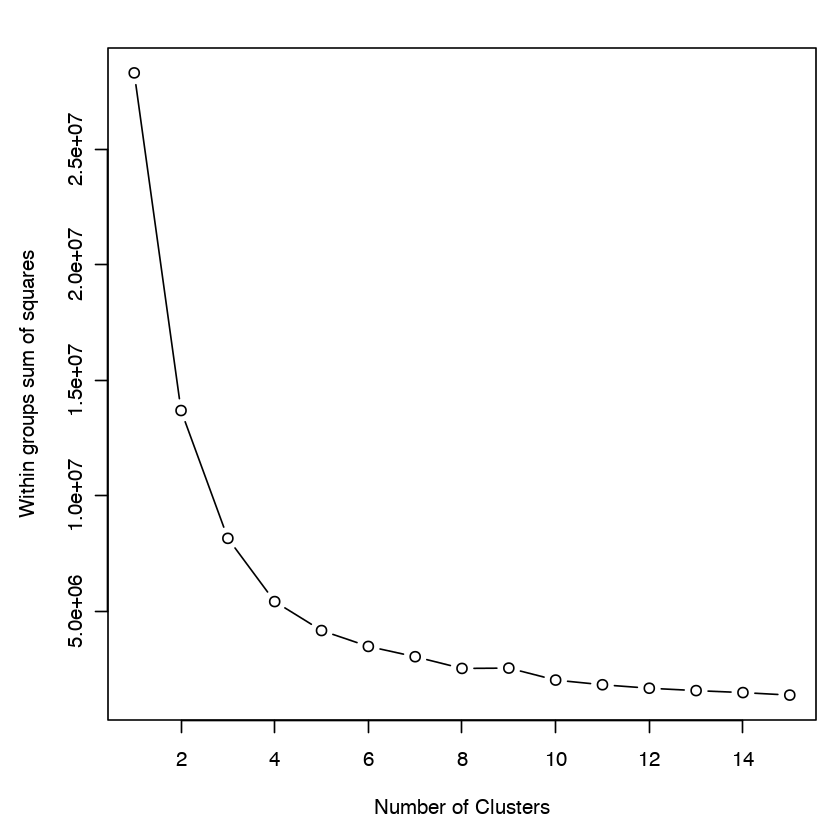

In [12]:
wss <- (nrow(coeffs)-1)*sum(apply(coeffs,2,var))
par(mfrow=c(1,1),mar=c(5,4.5,2,1))
for (i in 2:15) wss[i] <- sum(kmeans(coeffs, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares") 

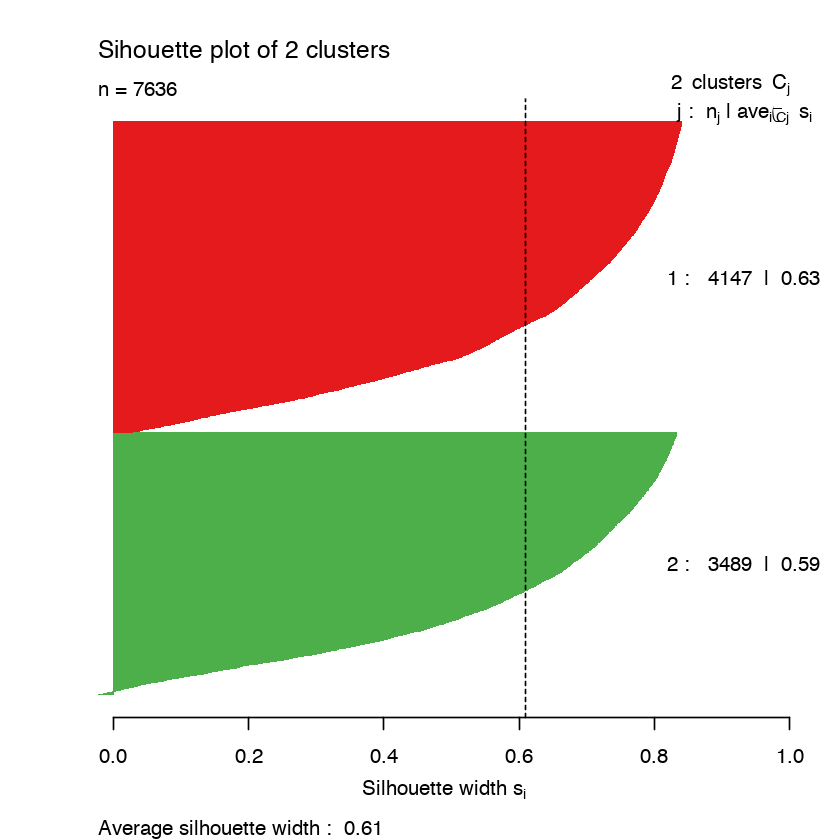

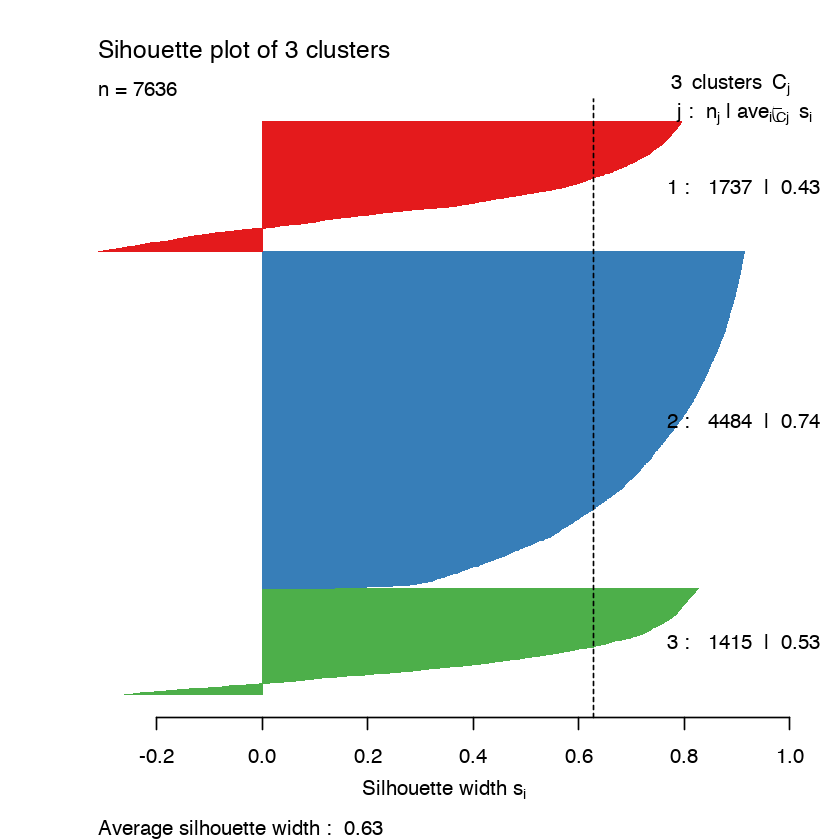

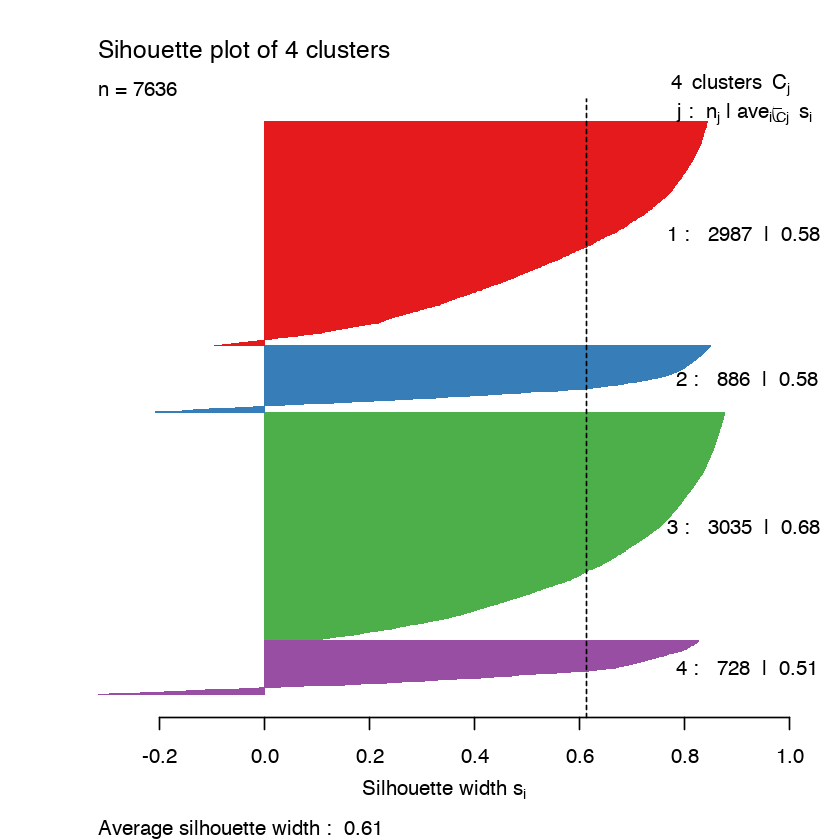

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 381800)”

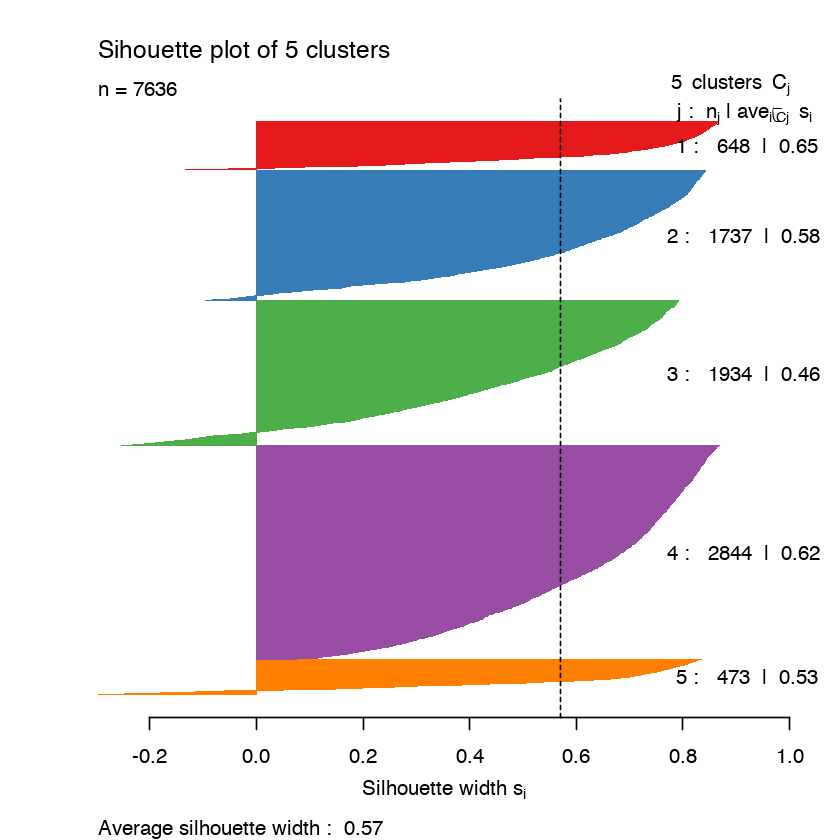

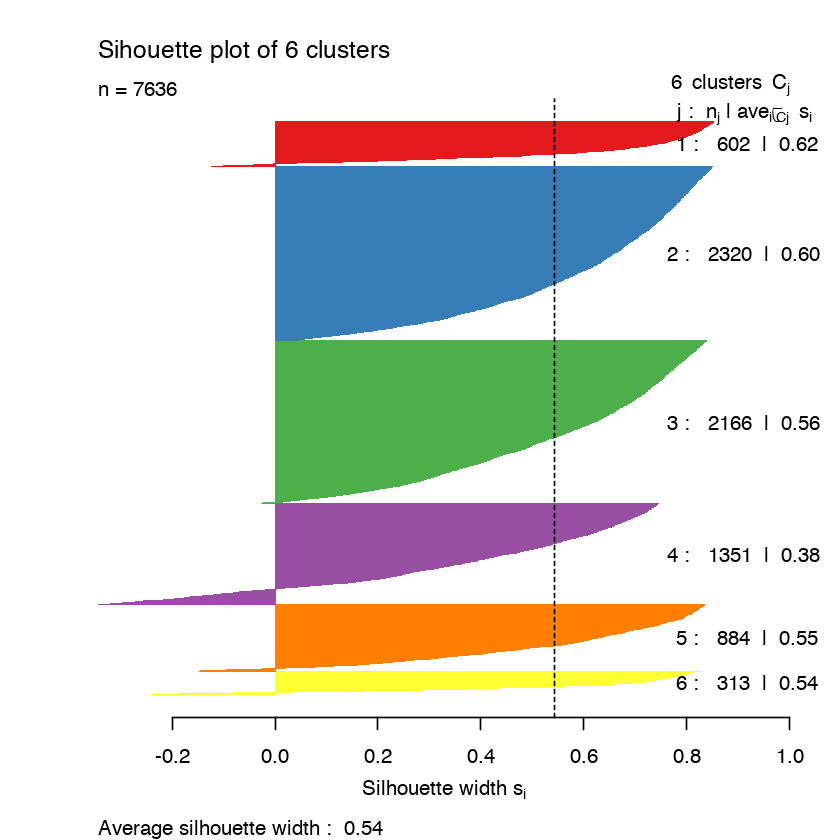

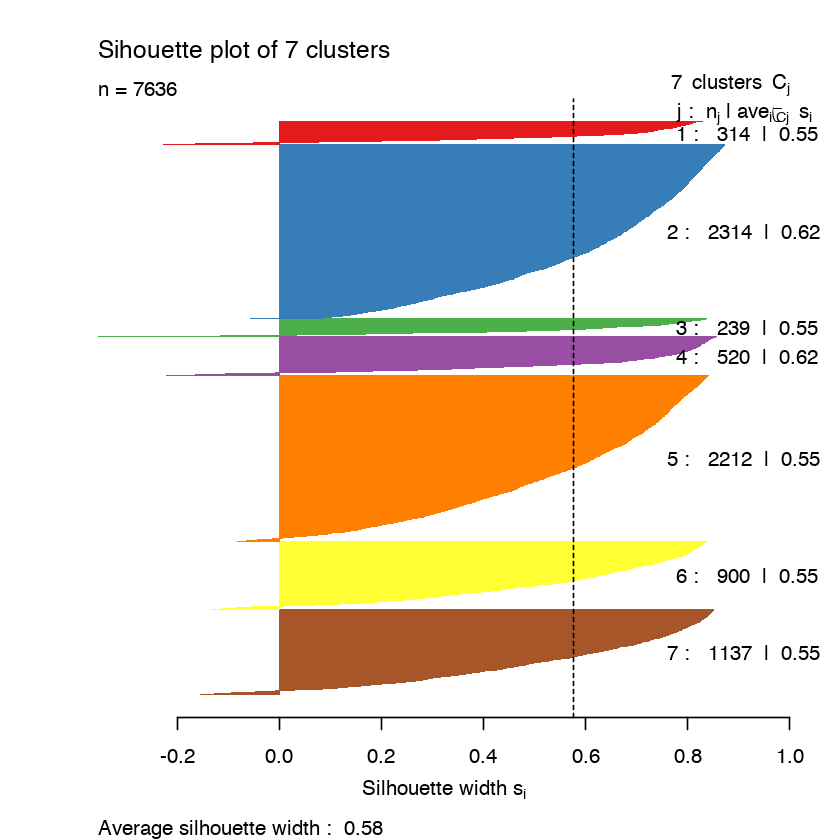

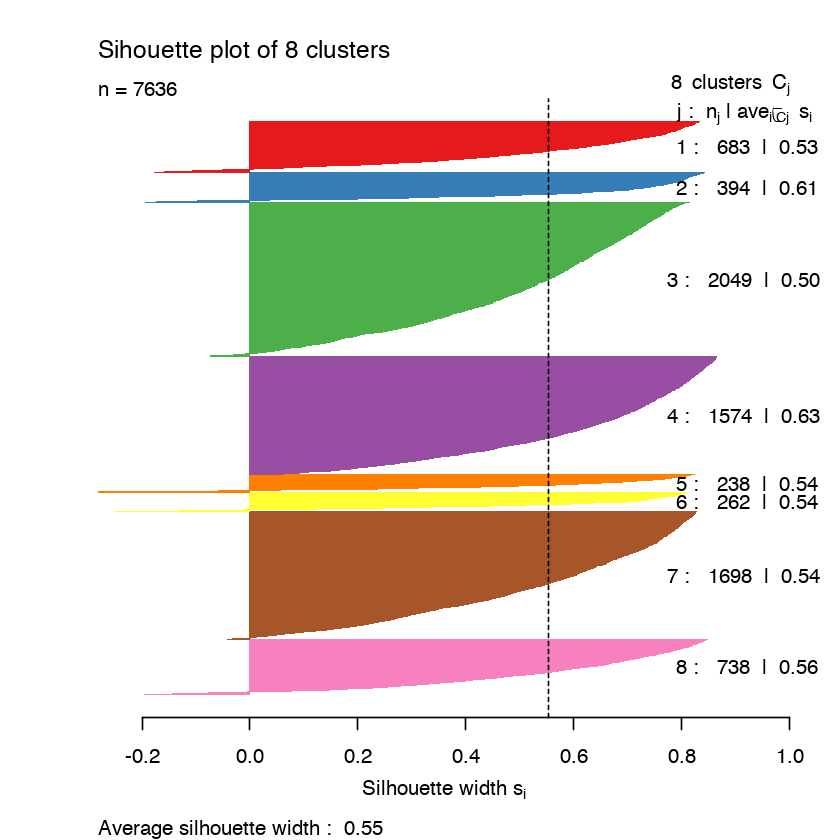

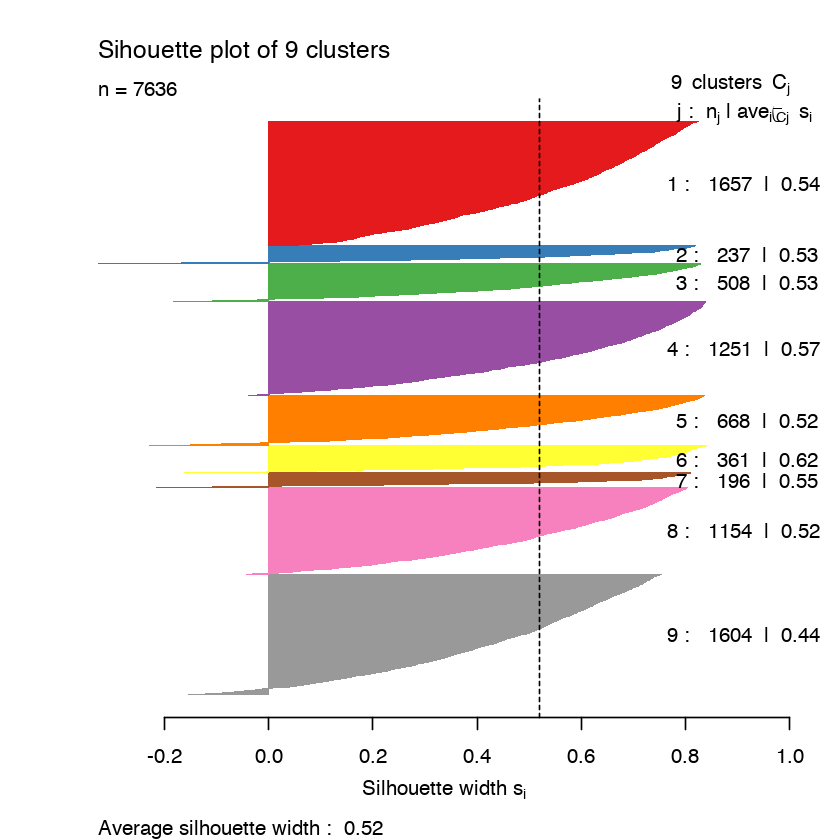

In [13]:
w <- vector()
par(mfrow=c(1,1))
for(ncluster in 2:9){
    nclr <- ncluster
    if(nclr > 2){
        plotclr <- brewer.pal(nclr,"Set1") 
    }else{
        plotclr <- c("#E41A1C", "#4DAF4A")
    }
    fit <- kmeans(coeffs, ncluster)
    dis <- dist(coeffs)^2
    sil <- silhouette(fit$cluster, dis)
    plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
    abline(v=mean(sil[,3]), lty=2)
    w[ncluster] <- mean(sil[,3])
}

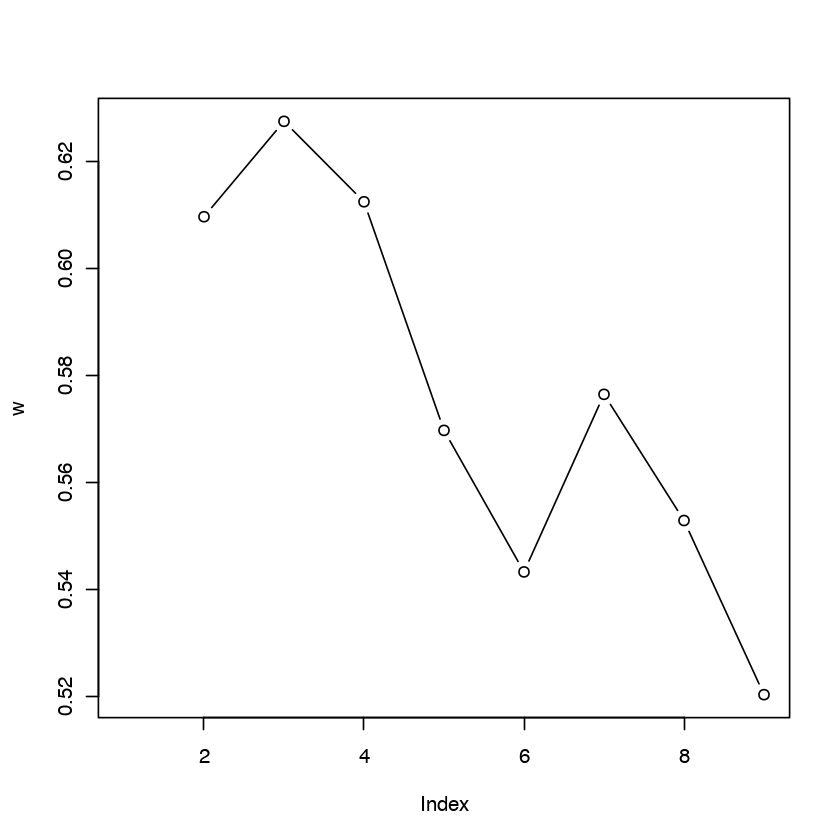

In [14]:
plot(w, type='b')

In [15]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [16]:
data.gwr <- cbind(data, xy)

In [17]:
ncluster <- 2
nclr <- ncluster
if(nclr > 2){
    plotclr <- brewer.pal(nclr,"Set1") 
}else{
    plotclr <- c("#E41A1C", "#4DAF4A")
}

In [18]:
fit <- kmeans(coeffs, ncluster)
dis <- dist(coeffs)^2
sil <- silhouette(fit$cluster, dis)

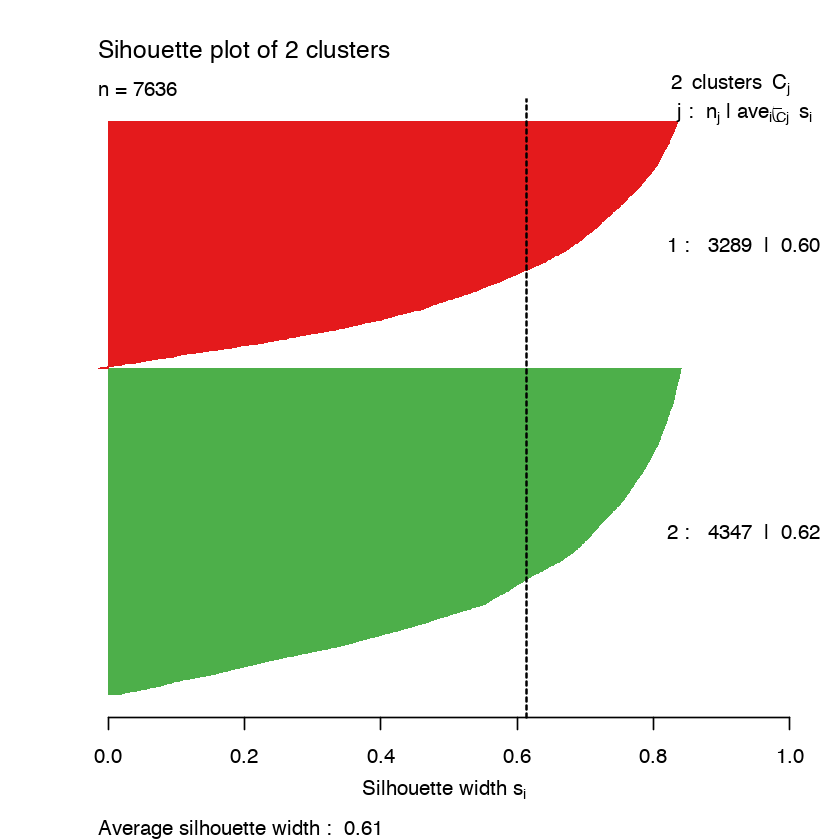

In [19]:
plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
abline(v=mean(sil[,3]), lty=2, lwd=1.5)

In [20]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

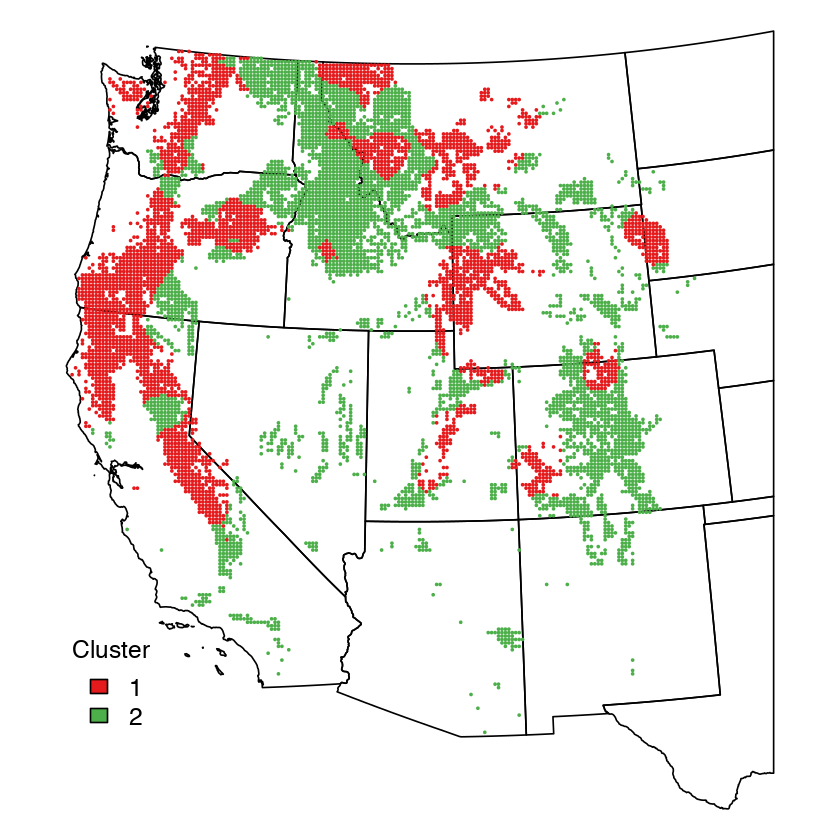

In [21]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)
legend(-1000000, -1200000, legend=sort(unique(fit$cluster)), title='Cluster',
    fill=attr(colcode, "palette"), cex=1.2, bty="n")

In [22]:
coeffs.updated <- data.frame(coeffs, fit$cluster)

In [23]:
titles <- c('Elevation', 'Tree density', 'MPB life cycle mean temprature', 'Cumulative precipitation')

In [24]:
coef.vars

[1] "etopo1"  "density" "Tmean"   "PPT"

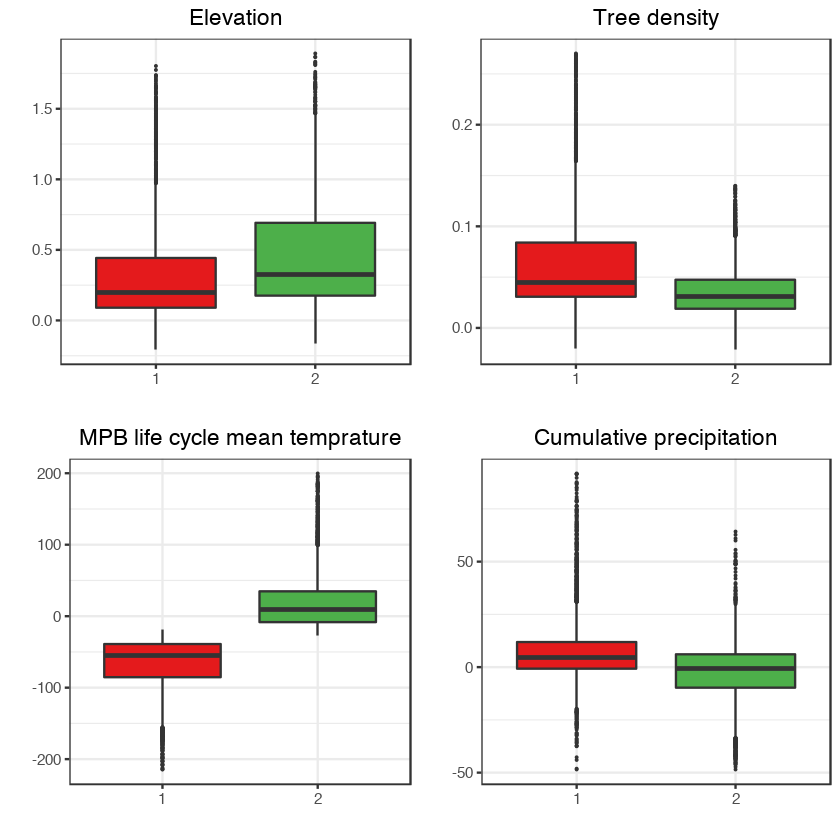

In [26]:
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
n1 <- c(rep(1,2),rep(2,2)); n2 <- rep(c(1,2),2) 
#png(paste0(out,"boxplot_clusters_scaled.png"), width=8, height=8, units="in", res=300)
grid.newpage()
pushViewport(viewport(layout = grid.layout(2, 2)))
for(v in coef.vars){
    i <- which(coef.vars==v)
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title=titles[i], x="", y = '')+
      theme_bw()+theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 
    print(g, vp = vplayout(n1[i], n2[i]))
}
#dev.off()

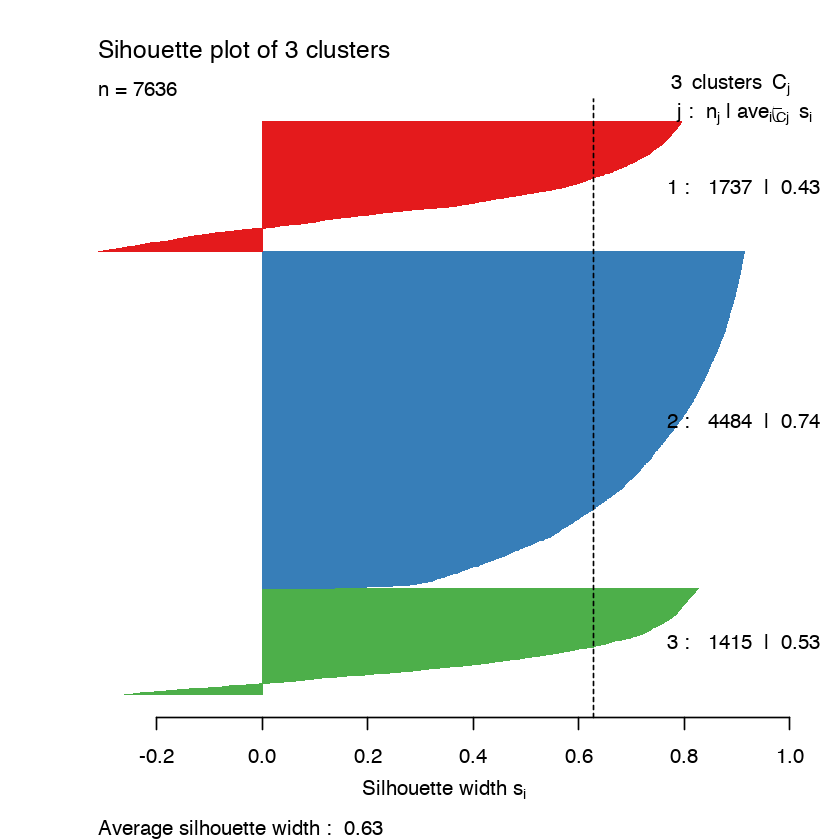

In [27]:
ncluster <- 3
nclr <- ncluster
if(nclr > 2){
    plotclr <- brewer.pal(nclr,"Set1") 
}else{
    plotclr <- c("#E41A1C", "#4DAF4A")
}
fit <- kmeans(coeffs, ncluster)
dis <- dist(coeffs)^2
sil <- silhouette(fit$cluster, dis)
plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
abline(v=mean(sil[,3]), lty=2)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

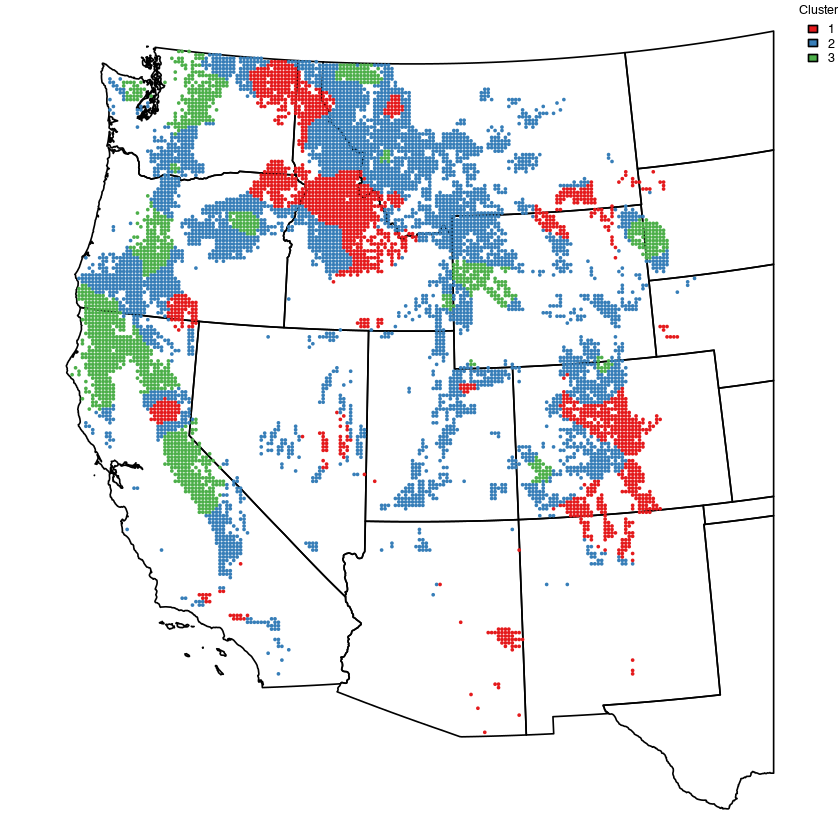

In [28]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)
legend('topright', legend=sort(unique(fit$cluster)), title='Cluster',
    fill=attr(colcode, "palette"), cex=0.6, bty="n")

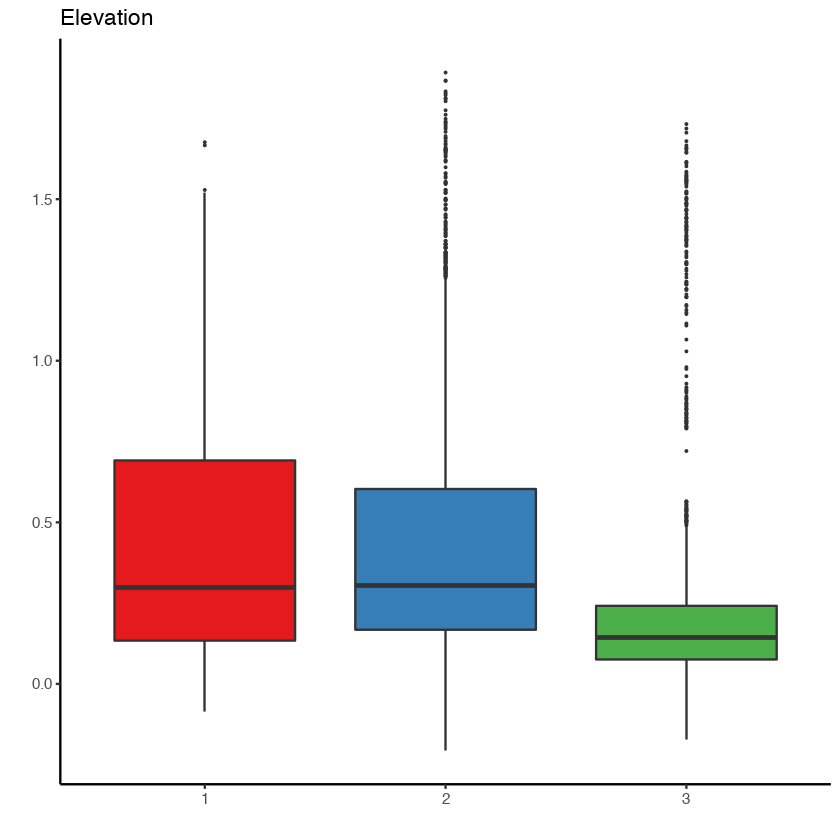

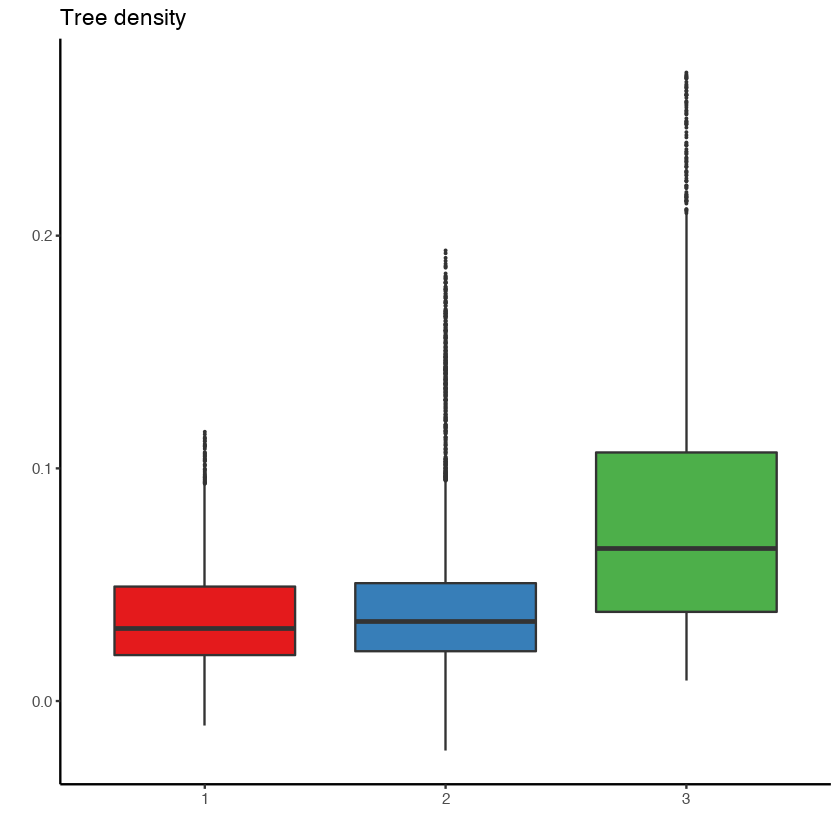

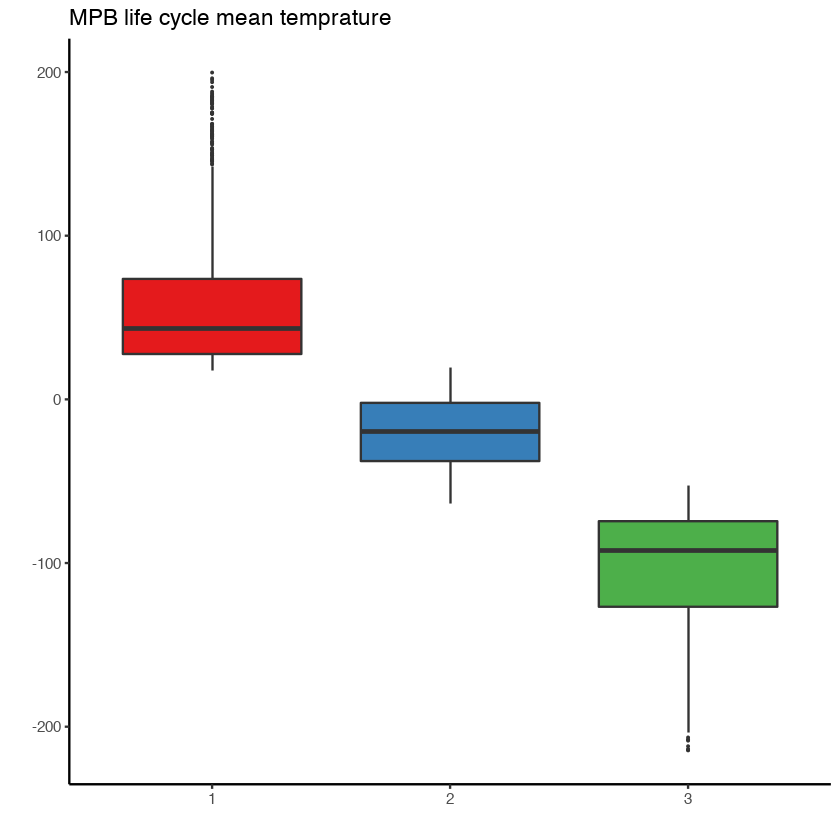

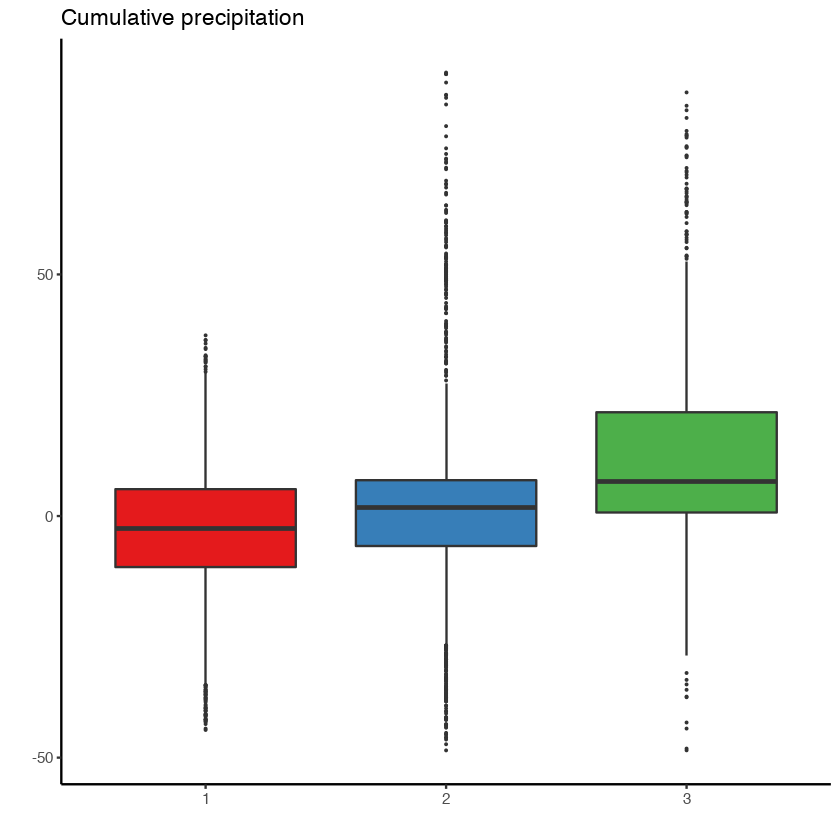

In [29]:
coeffs.updated <- data.frame(coeffs, fit$cluster)
par(mfrow=c(1, 1))
for(v in coef.vars){
    i <- which(coef.vars==v)
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title=titles[i], x="", y = '')+
      theme_classic() + theme(legend.position="none") 
    print(g)
}

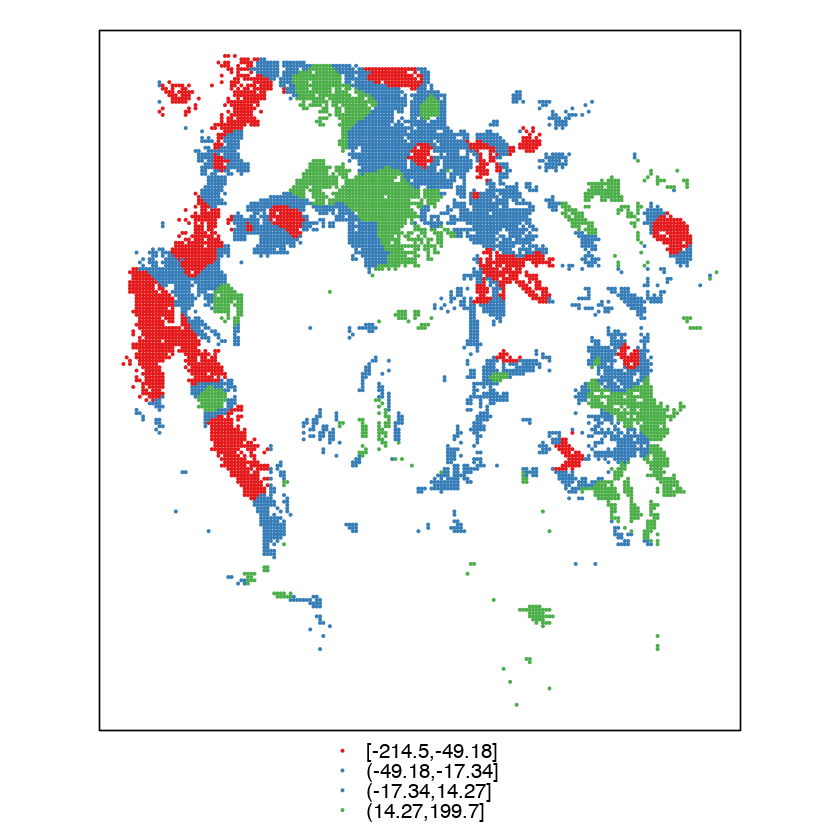

In [30]:
colours <- brewer.pal(3,"Set1")
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))
map.resids <- SpatialPointsDataFrame(data=data.frame(results[,'Tmean']), coords=cbind(xy$x,xy$y)) 
spplot(map.resids, cuts=quantile(results[,'Tmean']), col.regions=colours, cex=0.3) 

In [31]:
vars <- selected

In [32]:
enp <- 1601.442 
for(v in vars){
    results[,paste0(v, '_t')] <- results[,v] / results[,paste0(v, '_se')]
    t <- results[,paste0(v, '_t')]
    pvals <- round(2 * (1 - pt(abs(t), enp)), 3)
    results[,paste0(v, '_p')] <- pvals
    results[,paste0(v, '_p_by')] <- round(p.adjust(pvals, "BY", n = ntests))
    results[,paste0(v, '_p_bh')] <- round(p.adjust(pvals, "BH", n = ntests))
    results[,paste0(v, '_p_bo')] <- round(p.adjust(pvals, "bonferroni", n = ntests))
    asf_pvals <- round(pvals * (1 + enp - (enp/ntests)), 3)
    asf_pvals[asf_pvals > 1] <- 1
    results[,paste0(v, '_p_fb')] <- asf_pvals
}

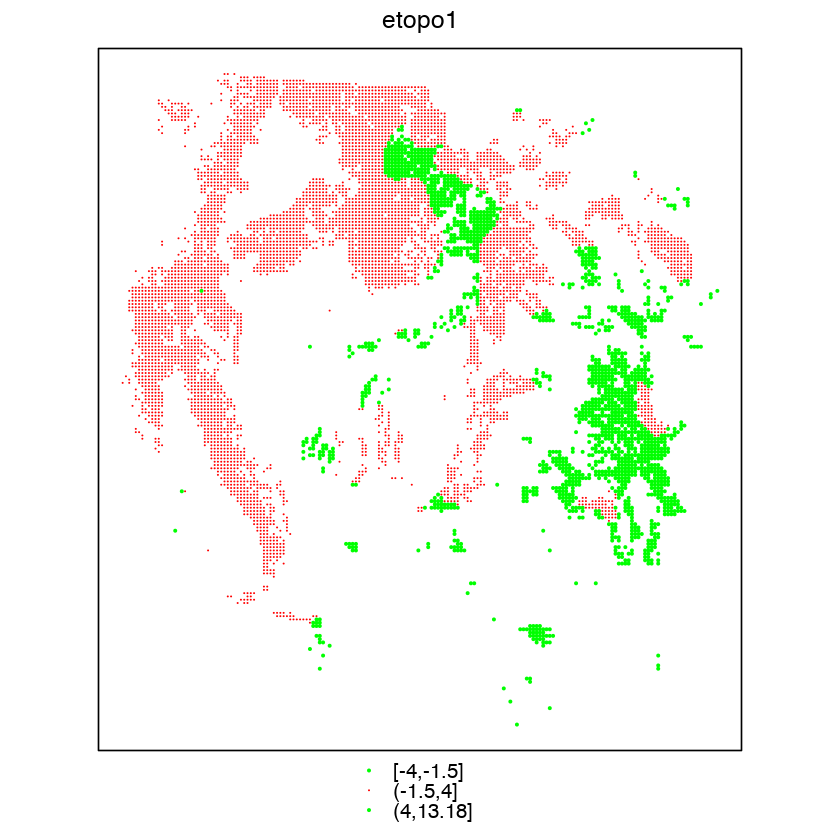

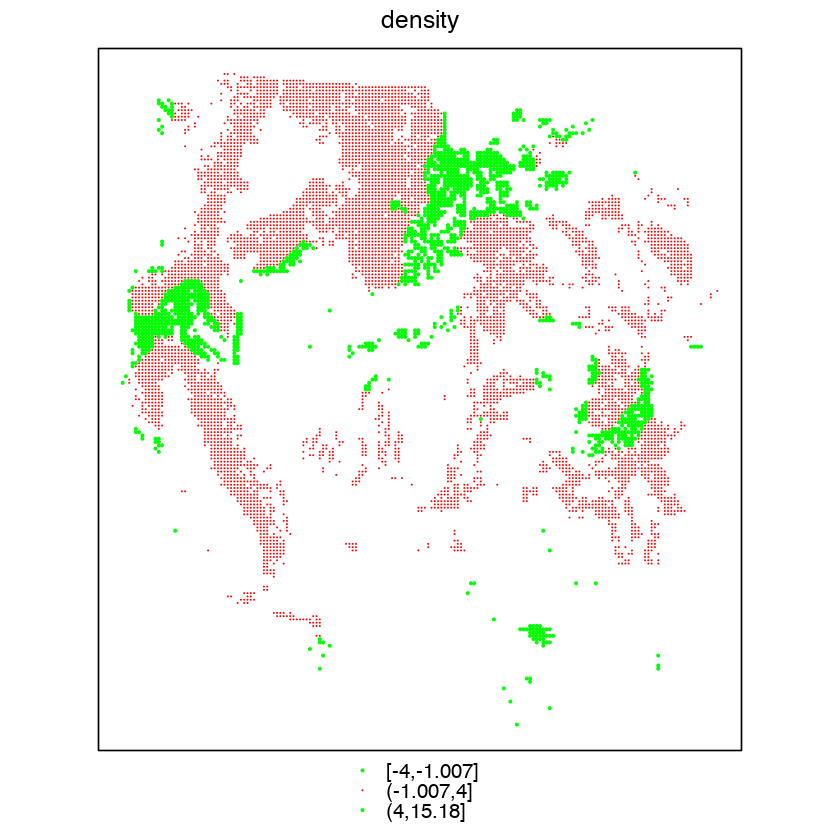

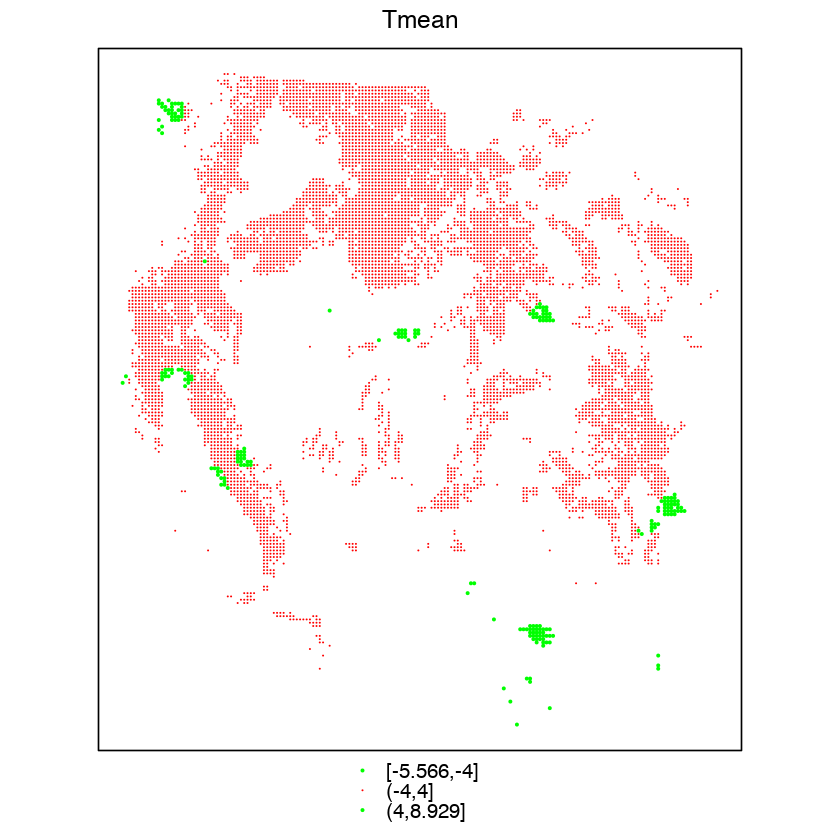

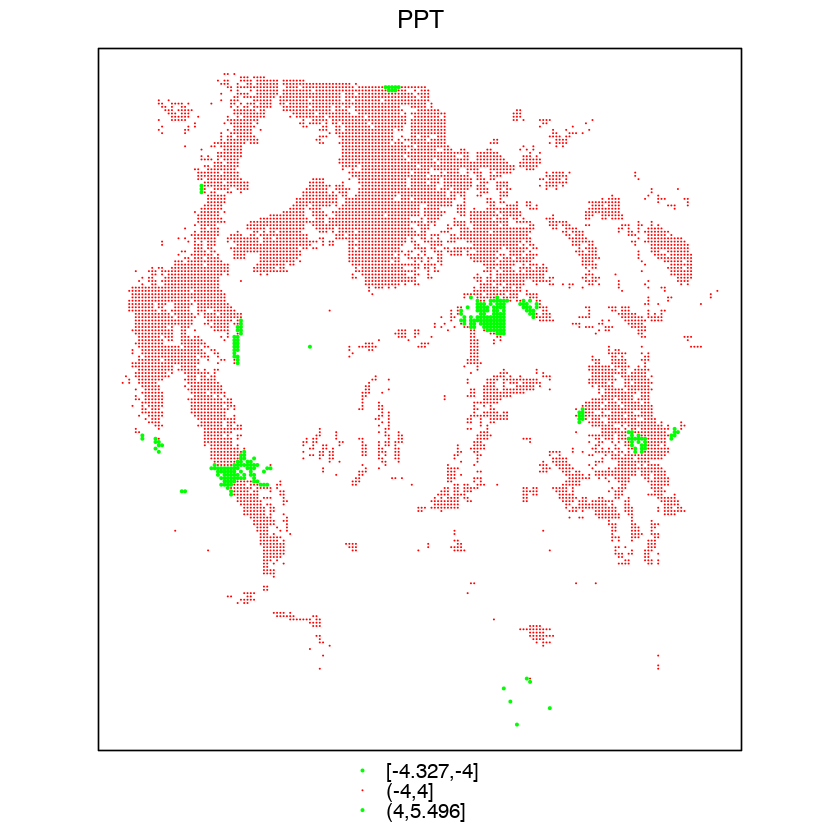

In [33]:
for(v in vars){
    t <- results[,paste0(v, '_t')]
    sig.map <- SpatialPointsDataFrame(data=data.frame(t), coords=cbind(xy$x,xy$y))
    colours <- c("green","red","green")
    breaks <- c(min(t),-4,4,max(t))
    print(spplot(sig.map, cuts=breaks, col.regions=colours, cex=c(0.3,0.1,0.3), main=v))
}

In [34]:
SDF <- SpatialPointsDataFrame(data=data.frame(results), coords=cbind(xy$x,xy$y))

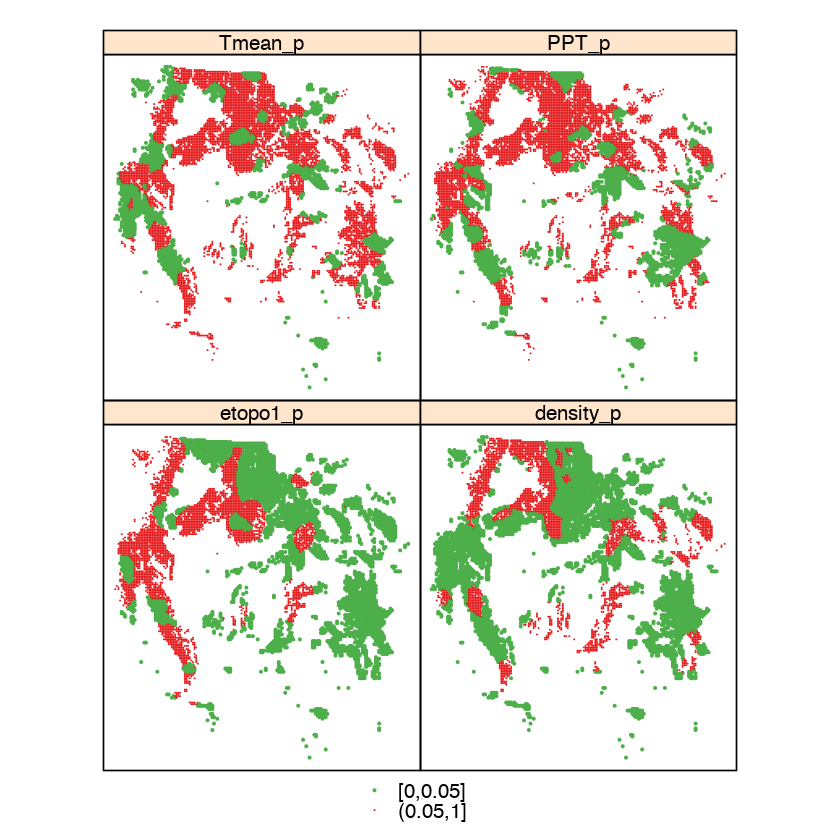

In [35]:
spplot(SDF, paste0(vars, '_p'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))

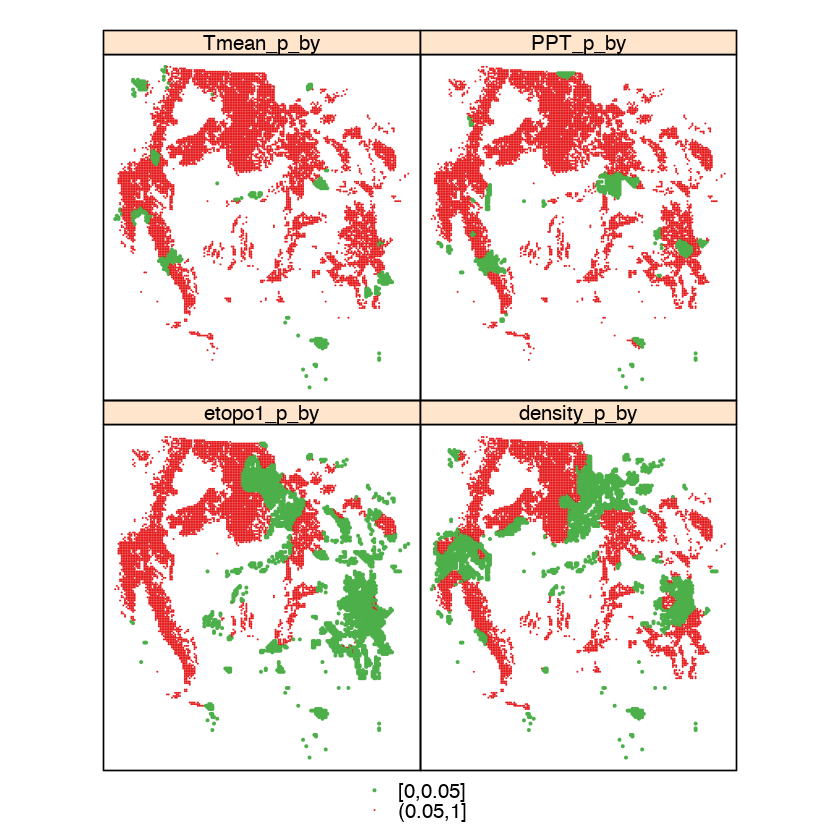

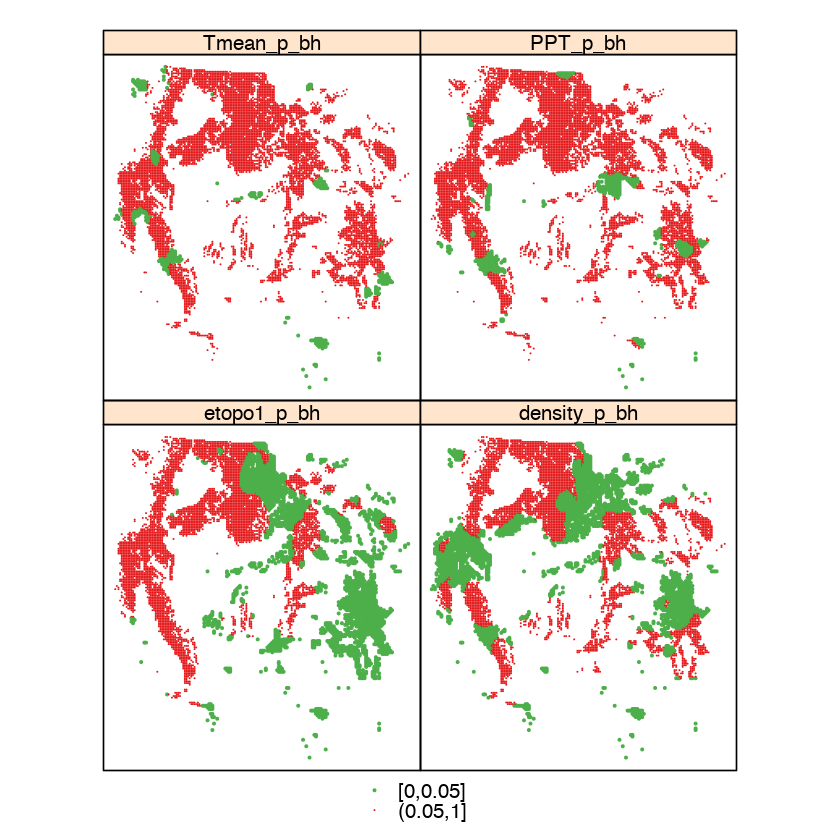

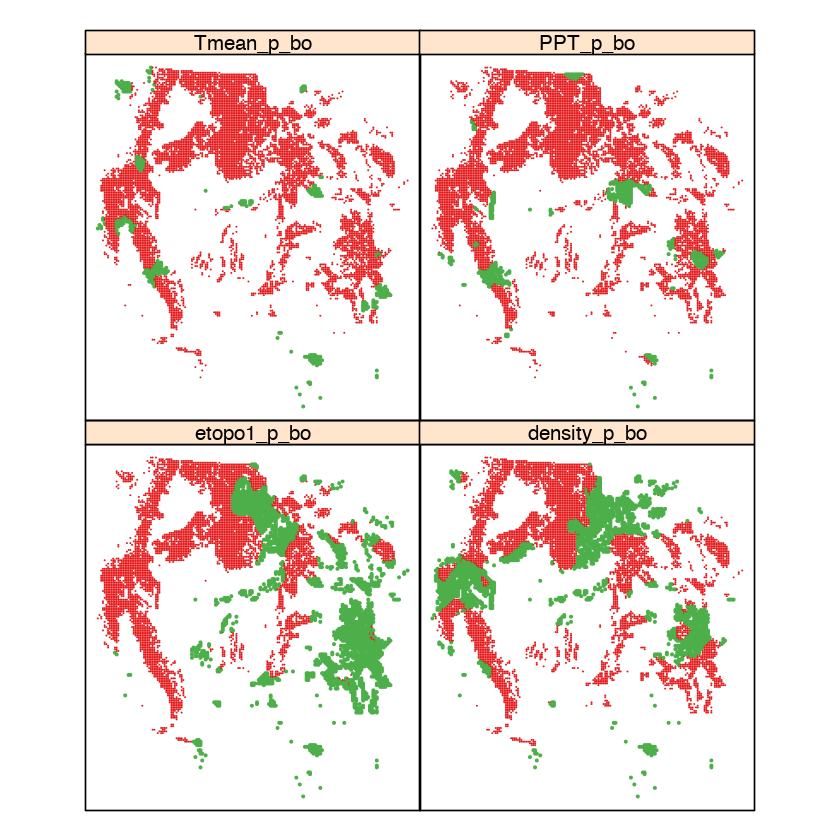

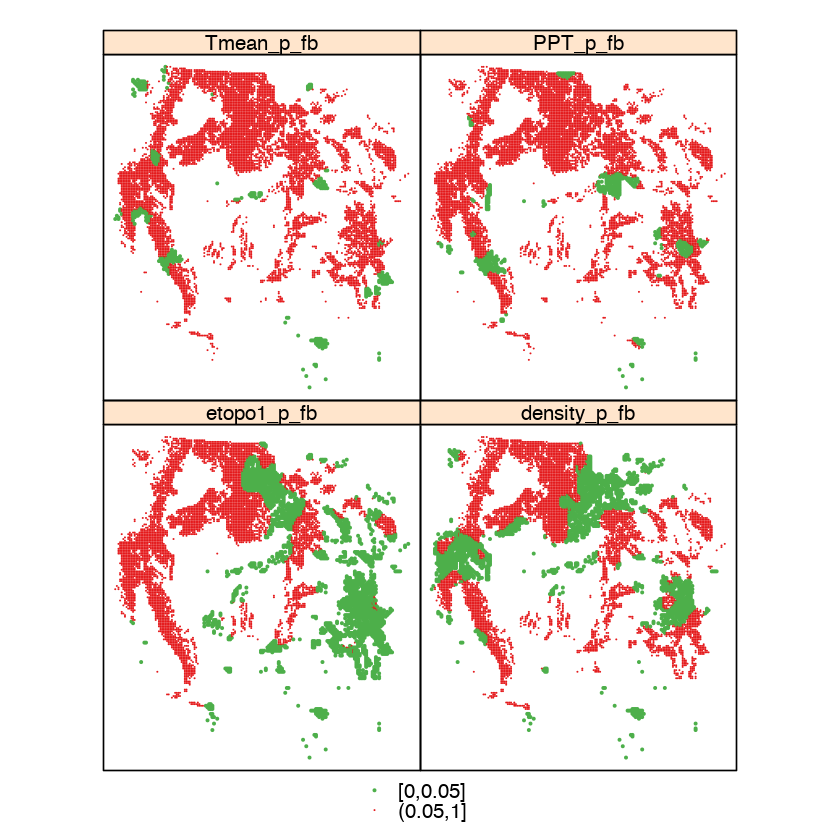

In [36]:
spplot(SDF, paste0(vars, '_p_by'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))
spplot(SDF, paste0(vars, '_p_bh'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))
spplot(SDF, paste0(vars, '_p_bo'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), 
       cex=c(0.3,0.1), auto.key=FALSE)
spplot(SDF, paste0(vars, '_p_fb'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))